In [16]:
#import all libraries

import scipy
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#define the class for simulation

class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300, h=0):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
              
            h (float) The external field applied to the grid
        '''
        self.size = size
        self.temperature = temperature
        self.h = h
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        
        self.temperature = float(temp)
        
    def set_h(self, temp):
        '''
        Set the external magnetic field acting on the model
        '''
        
        self.h = temp

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        
        return ((-self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1) +
            scipy.roll(self.state, -1, axis=0) +
            scipy.roll(self.state, -1, axis=1))).sum()) - 
               self.h * self.state.sum())

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        # Calculates the energy for this single cell
        delta_E = ((2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size]))
                   + 2 * self.h * self.state[i,j])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        
        #Determines if the state should be flipped
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


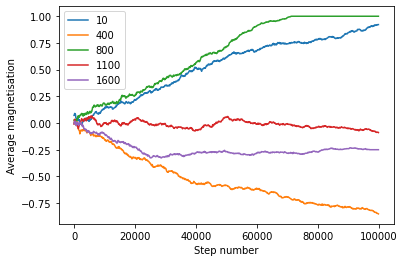

In [17]:
size = 32
temps = [10, 400, 800, 1100, 1600]

for temp in temps:
  sim = IsingSimulation(size, temperature=10)
  steps = []
  mags = []
  for _ in range(100000):
    sim.update()
    if _ % 100 == 0:
      steps.append(_)
      mags.append(sim.average_magnetism())
  plt.plot(steps, mags, label = temp)
  plt.xlabel("Step number")
  plt.ylabel("Average magnetisation")
  plt.legend()

For h=0, we know that the behaviour of magnetization around critical temperature is erratic. It varies a lot. For any temperature below critical temperature, the magnetization value tends towards +1 or -1. And for any value above critical temperature, average magnetization is centered around 0, but still varies. Based on that, and from our plot above, we see that T=1100 and T=1600 are closer to the critical temperature. When we run this simulation multiple times, we see that we are unable to completely determine which is closer to critical temperature because the behavior is not very pronounced. One reason why we cannot tell is because our simulation only flips 1 cell at each time, and 100000 may not be enough to see an overall behavior of the system. If we run this for longer, we can make a better guess that T=1100 is closer to the critical temperature.

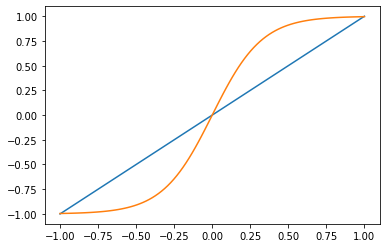

In [18]:
#2

#We use the same initial conditions as above, i.e. J = 6.34369e-21, h =0, 
#k = 1.38065e-23, size = 32, T = 600K
#We our summin over 4 nearest neaighbours when we calculate the energy,
#hence, d = 2 in our case.
#using mean field theory, it becomes M = tanh((4*6.34369e-21/600*1.38065e-23)*M)
#Therefore, M = tanh(3.0631*M). We solve this using graph

ms = np.linspace(-1, 1, 100)
ys = [np.tanh(3.0631*m) for m in ms]

plt.plot(ms, ms, label = 'y=m')
plt.plot(ms, ys, label = 'y = tanh(3.0631*m')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead


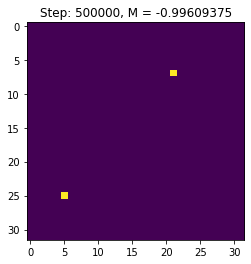

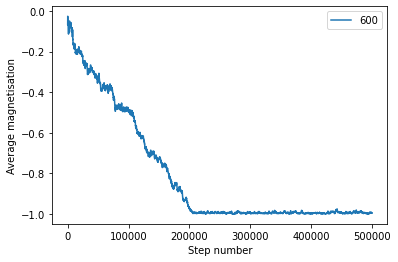

In [29]:
#from above, we see that m=0, -1, and 1 are the solutions of the equation. 
#Hence, from mean field theory, we expect the simulation to give a 
#magnetization of 0, -1, 1. We need to calculate the stability of the system
#at each of these positions by calculating the free energy. m=1 and -1 should 
#be equally likely, so we will expect to get m=1 or m=-1

T = 600
sim1 = IsingSimulation(size, temperature=T)
steps = []
mags = []

for _ in range(500000):
    sim1.update()
    if _ % 100 == 0:
        steps.append(_)
        mags.append(sim1.average_magnetism())
sim1.display()
plt.figure()
plt.plot(steps, mags, label = T)
plt.xlabel("Step number")
plt.ylabel("Average magnetisation")
plt.legend()
plt.show()

The simulation agrees with the mean field theory value. But this may not always be the case. Many times, we would not get the required value. Most of the times it will be because we did not run the system for long enough for it to reach the equilibrium position. The other reasons are because the mean field theory makes a few assumptions because of which the value is not exactly correct.